Question 1. Regression Problem:

•	Dataset: Kaggle link (Weather Data) 

•	Consider the above-mentioned dataset for a regression problem (where output labels are numeric) and apply following feature selection techniques:

•	Correlation Analysis

•	Mutual Information

•	Variance Threshold (Not discussed in the lecture, need to do a research by your side)

•	Plot the feature importance graph as well and comment which technique provided more usefule set of features and why ?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv("./data/weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


Correlation Analysis

<AxesSubplot:>

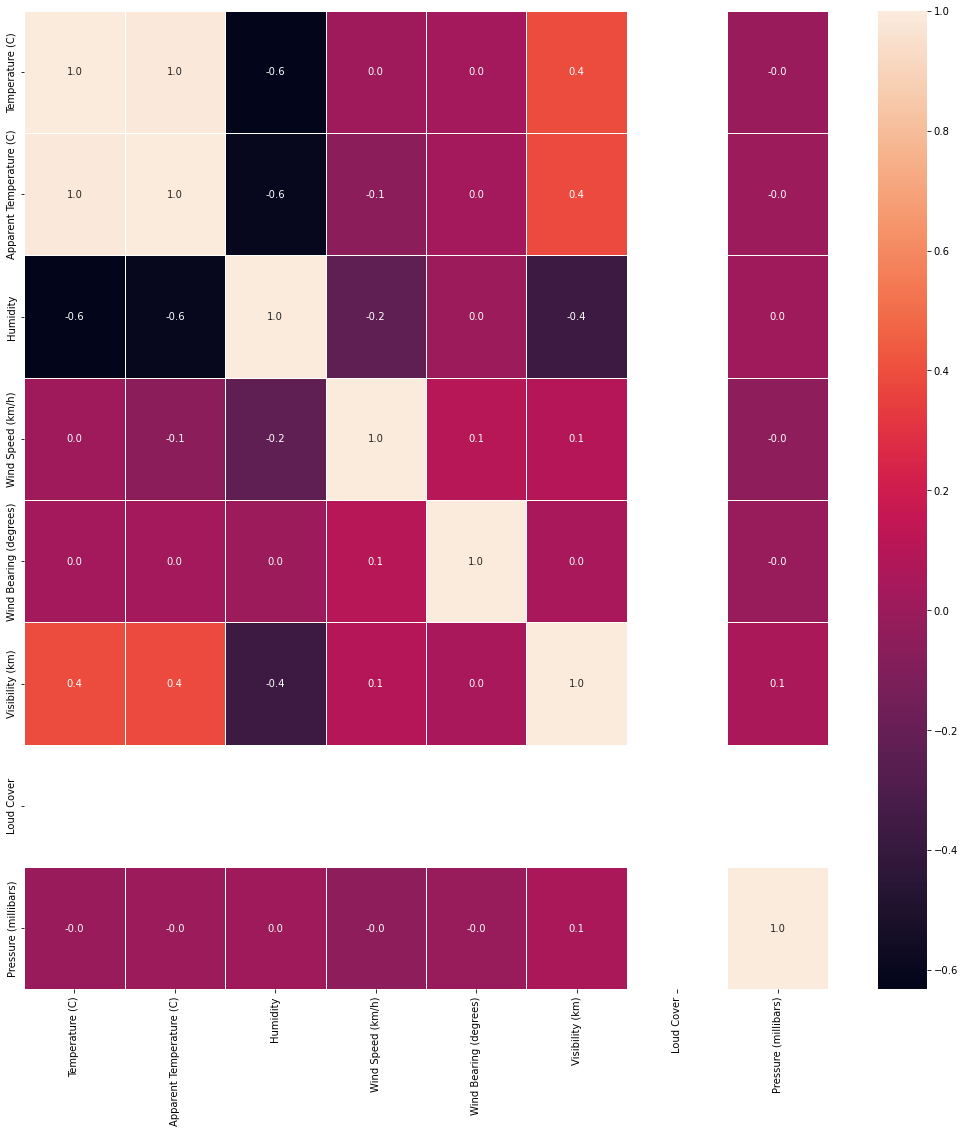

In [4]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pd.DataFrame(data).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [5]:
data.groupby(data["Precip Type"].isnull()).mean()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Precip Type,,,,,,,,
False,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
True,10.393015,9.462841,0.745667,11.869188,185.738878,7.549499,0.0,1019.179188


In [6]:
from sklearn.feature_selection import VarianceThreshold

data.fillna(0,inplace=True)
y = data["Precip Type"]
data.drop(["Formatted Date","Summary","Precip Type", "Daily Summary"],axis = 1,inplace = True)

Number of rain:  85224
Number of snow :  10712
Number of None :  517


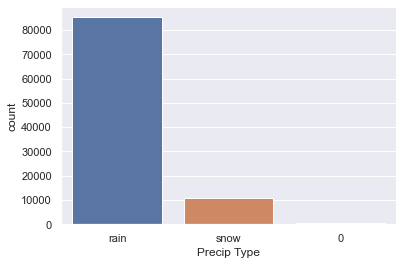

In [7]:
x = data
sns.set(style="darkgrid")
ax = sns.countplot(x = y)
rain, snow, none = y.value_counts(sort=True)
print('Number of rain: ',rain)
print('Number of snow : ',snow)
print('Number of None : ',none)

In [8]:
x.to_numpy(),y.to_numpy()

(array([[9.47222222e+00, 7.38888889e+00, 8.90000000e-01, ...,
         1.58263000e+01, 0.00000000e+00, 1.01513000e+03],
        [9.35555556e+00, 7.22777778e+00, 8.60000000e-01, ...,
         1.58263000e+01, 0.00000000e+00, 1.01563000e+03],
        [9.37777778e+00, 9.37777778e+00, 8.90000000e-01, ...,
         1.49569000e+01, 0.00000000e+00, 1.01594000e+03],
        ...,
        [2.20388889e+01, 2.20388889e+01, 5.60000000e-01, ...,
         1.61000000e+01, 0.00000000e+00, 1.01566000e+03],
        [2.15222222e+01, 2.15222222e+01, 6.00000000e-01, ...,
         1.61000000e+01, 0.00000000e+00, 1.01595000e+03],
        [2.04388889e+01, 2.04388889e+01, 6.10000000e-01, ...,
         1.55204000e+01, 0.00000000e+00, 1.01616000e+03]]),
 array(['rain', 'rain', 'rain', ..., 'rain', 'rain', 'rain'], dtype=object))

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

new_y = y

new_y.fillna('nan')
new_y[new_y=='nan']
new_y = pd.DataFrame(new_y.to_numpy())
new_y.shape
new_y.head()
new_y['num'] = 1
new_y.head()
new_y[0].drop_duplicates()
new_y[0].astype(str).to_numpy()

labels = le.fit_transform(new_y[0].astype(str).to_numpy())
print(labels.shape)

(96453,)


•	Variance Threshold

In [10]:
selector = VarianceThreshold()
tmp=selector.fit_transform(data.to_numpy())

tmp

array([[9.47222222e+00, 7.38888889e+00, 8.90000000e-01, ...,
        2.51000000e+02, 1.58263000e+01, 1.01513000e+03],
       [9.35555556e+00, 7.22777778e+00, 8.60000000e-01, ...,
        2.59000000e+02, 1.58263000e+01, 1.01563000e+03],
       [9.37777778e+00, 9.37777778e+00, 8.90000000e-01, ...,
        2.04000000e+02, 1.49569000e+01, 1.01594000e+03],
       ...,
       [2.20388889e+01, 2.20388889e+01, 5.60000000e-01, ...,
        3.00000000e+01, 1.61000000e+01, 1.01566000e+03],
       [2.15222222e+01, 2.15222222e+01, 6.00000000e-01, ...,
        2.00000000e+01, 1.61000000e+01, 1.01595000e+03],
       [2.04388889e+01, 2.04388889e+01, 6.10000000e-01, ...,
        3.90000000e+01, 1.55204000e+01, 1.01616000e+03]])

In [11]:
list(data.columns)

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [12]:
new_data = pd.DataFrame(tmp)
data_column = list(data.columns)
data_column.remove("Loud Cover")
new_data.columns = data_column

In [13]:
x.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


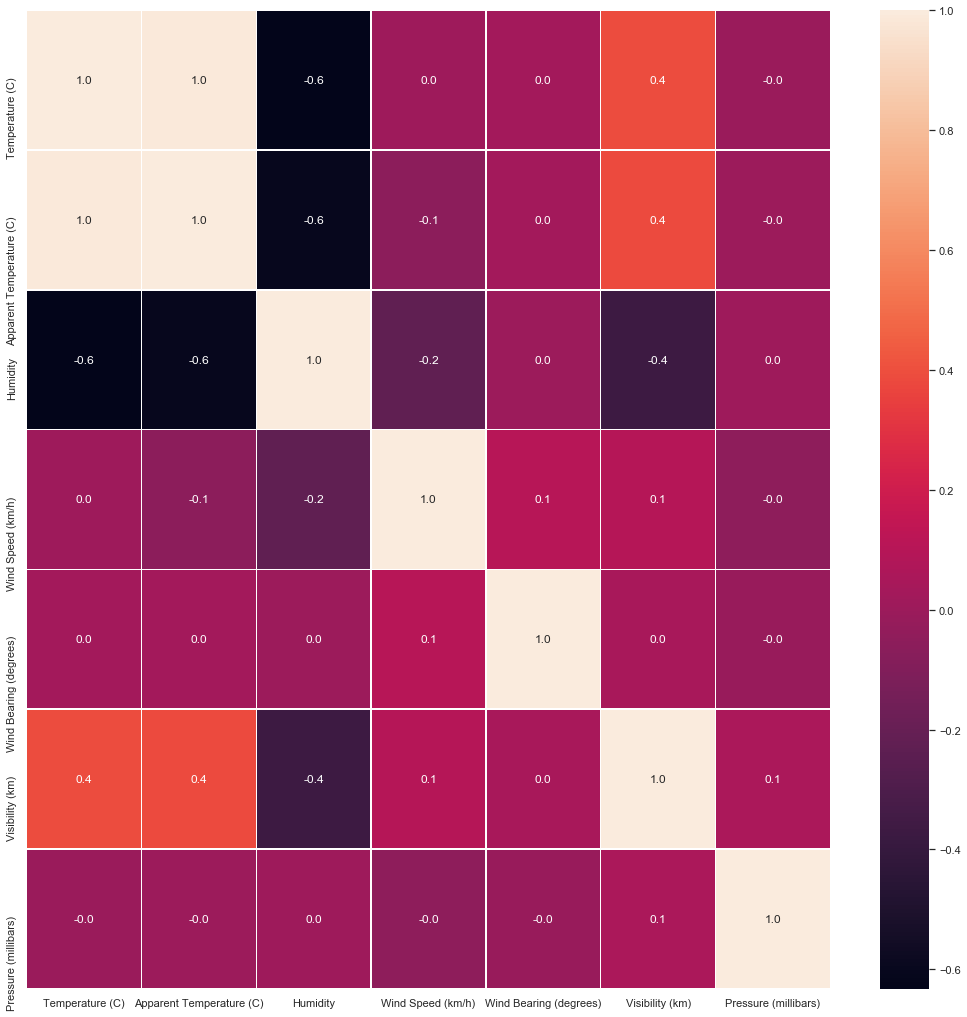

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(new_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Mutual Information with "Loud Cover"

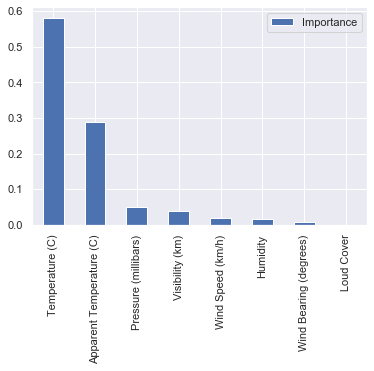

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier( n_estimators=50)
    
model = clf.fit(x.to_numpy(),labels)
feat_importances = pd.DataFrame(model.feature_importances_, index=x.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

Mutual Information without "Loud Cover"

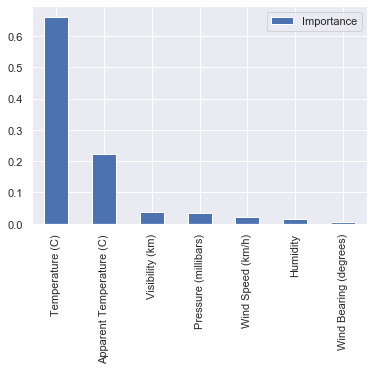

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier( n_estimators=50)
    
model = clf.fit(new_data.to_numpy(),labels)
feat_importances = pd.DataFrame(model.feature_importances_, index=new_data.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

Temperature (C) is the most useful feature as it get the highest mark from the feature importance.

Question 2. Classification Problem with Categorical Data:

•	Dataset: Breast Cancer (Attached below)

•	Apply following feature selection techniques and plot the feature importance graph for each technique.

•	Chi Square test 

•	Mutual Information

•	Comment on the usefulness of features extracted from the feature selection techniques.


In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
data = pd.read_csv("./breast_cancer_dataset.csv")
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


Chi Square test

In [19]:
chisqt = pd.crosstab(data['irradiat'], data['inv-nodes'], margins=True)
print(chisqt)

inv-nodes  0-2  12-14  15-17  24-26  3-5  6-8  9-11  All
irradiat                                                
no         183      0      5      0   19    8     3  218
yes         30      3      1      1   17    9     7   68
All        213      3      6      1   36   17    10  286


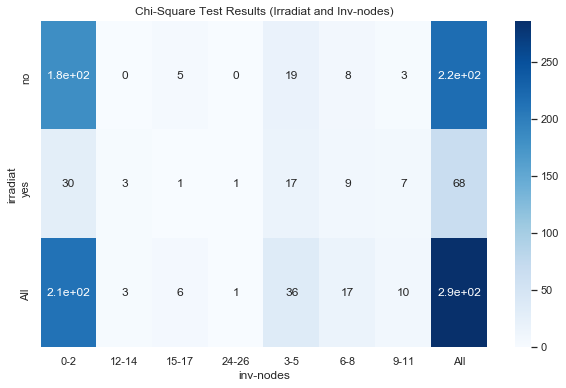

In [20]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(chisqt, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results (Irradiat and Inv-nodes)')
plt.show()

In [21]:
from scipy.stats import chi2_contingency 

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(37.26499190340025, 1.5884931291068556e-07, 4)


In [22]:
chisqt = pd.crosstab(data['irradiat'], data['tumor-size'], margins=True)
print(chisqt)

tumor-size  0-4  10-14  15-19  20-24  25-29  30-34  35-39  40-44  45-49  5-9  \
irradiat                                                                       
no            8     25     24     41     37     44     15     15      1    3   
yes           0      3      6      9     17     16      4      7      2    1   
All           8     28     30     50     54     60     19     22      3    4   

tumor-size  50-54  All  
irradiat                
no              5  218  
yes             3   68  
All             8  286  


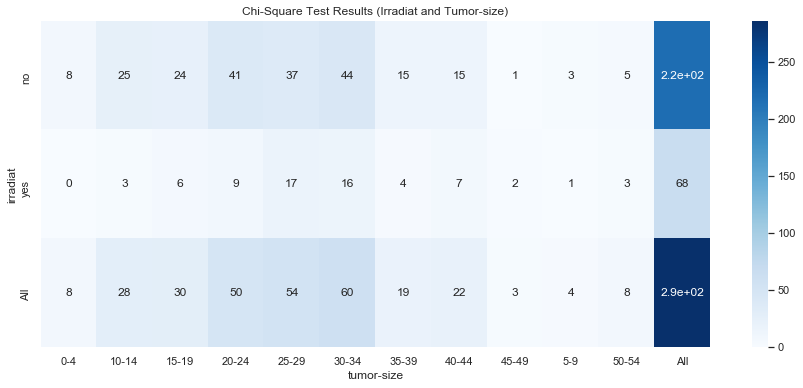

In [23]:
fig = plt.figure(figsize=(15,6))
sns.heatmap(chisqt, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results (Irradiat and Tumor-size)')
plt.show()

In [24]:
from scipy.stats import chi2_contingency 

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(7.874244282074972, 0.09629493649056009, 4)


Mutual Information

class: 3.558077
age: 1.600730
menopause: 1.141062
tumor-size: 3.662150
inv-nodes: 62.727376
node-caps: 0.488545
deg-malig: 2.942391
breast: 0.059167
breast-quad: 0.242439


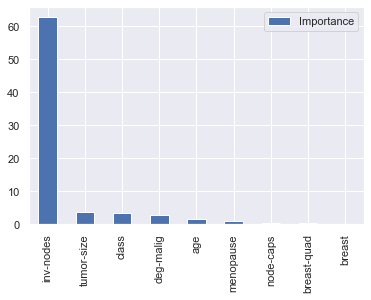

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

dataset = data.values
X = dataset[:, :-1]
y = dataset[:,-1]
X = X.astype(str)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# prepare input data
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)

# prepare output data
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print(list(data.columns)[i] + ': %f' % (fs.scores_[i]))
    
# plot the scores
new_data_columns = data.iloc[:, :-1]

feat_importances = pd.DataFrame(fs.scores_, index=list(new_data_columns), columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

For Chi Square test, it is used in statistics to test the independence of two events. So when you need to mainly concerned with two data, you can find more detail by using it.

For Mutual Information, it can calculate all the scores of all data at the same time. When you want to find more than two data, you can find which one is more importance by this.